<a href="https://colab.research.google.com/github/somezzedup/Micro-Credential-Winter-2022/blob/main/Property_%26_Election_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as py

In [ ]:
property =pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/property.csv')

In [ ]:
property.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [ ]:
new_property.shape

(9, 6)

In [ ]:
#setting index  to PID column
new_property = property.set_index('PID')
new_property.head()


,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,NaN,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600


In [ ]:
#any null value in number of bedroom column is changed to 0 
new_property['NUM_BEDROOMS'] = new_property['NUM_BEDROOMS'].fillna(0)

In [ ]:
new_property

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,0,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600
100006000.0,207.0,BERKELEY,Y,0,1,800
100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
100008000.0,213.0,TREMONT,Y,1,1,NaN
100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
new_property.columns

Index(['ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [ ]:
new_property.values

array([[104.0, 'PUTNAM', 'Y', '3', '1', '1000'],
       [197.0, 'LEXINGTON', 'N', '3', '1.5', '--'],
       [nan, 'LEXINGTON', 'N', 0, '1', '850'],
       [201.0, 'BERKELEY', '12', '1', nan, '700'],
       [203.0, 'BERKELEY', 'Y', '3', '2', '1600'],
       [207.0, 'BERKELEY', 'Y', 0, '1', '800'],
       [nan, 'WASHINGTON', nan, '2', 'HURLEY', '950'],
       [213.0, 'TREMONT', 'Y', '1', '1', nan],
       [215.0, 'TREMONT', 'Y', 'na', '2', '1800']], dtype=object)

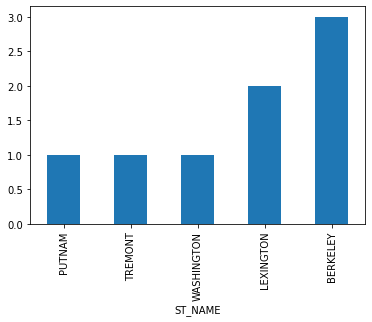

In [ ]:
new_property.groupby(['ST_NAME'])['SQ_FT'].count().sort_values(ascending = True).plot(kind='bar')

In [ ]:
election =pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/2020%20November%20General%20Election%20-%20Turnout%20Rates.csv')

In [ ]:
election.head()

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [ ]:
election.shape

(52, 15)

In [ ]:
#setting index  to state column
new_election = election.set_index('State')
new_election.head()

,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
State,,,,,,,,,,,,,,
United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [ ]:
new_election.columns

Index(['Source', 'Official/Unofficial', 'Total Ballots Counted (Estimate)',
       'Vote for Highest Office (President)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Prison', 'Probation', 'Parole',
       'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
      dtype='object')

In [ ]:
column_to_be_dropped = ['Official/Unofficial','Prison', 'Probation', 'Parole', 'Total Ineligible Felon','Overseas Eligible']

In [ ]:
type(column_to_be_dropped)

list

In [ ]:
df = new_election.drop(column_to_be_dropped, axis = 1)

In [ ]:
df.head()

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,State Abv
State,,,,,,,,
United States,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,"367,000",NaN,69.8%,"525,568","551,117",3.4%,AK
Arizona,https://results.arizona.vote/#/featured/18/0,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,AR


In [ ]:
df.shape

(52, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, United States to Wyoming
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Source                               40 non-null     object
 1   Total Ballots Counted (Estimate)     52 non-null     object
 2   Vote for Highest Office (President)  24 non-null     object
 3   VEP Turnout Rate                     52 non-null     object
 4   Voting-Eligible Population (VEP)     52 non-null     object
 5   Voting-Age Population (VAP)          52 non-null     object
 6   % Non-citizen                        52 non-null     object
 7   Overseas Eligible                    1 non-null      object
 8   State Abv                            51 non-null     object
dtypes: object(9)
memory usage: 4.1+ KB
